# 모두를 위한 딥러닝 시즌2
## Lab02_Simple Regression LAB

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### H(x) = Wx+b

In [2]:
# Data
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

In [3]:
# W, b inintialize
W = tf.Variable(2.0)
b = tf.Variable(0.5)

In [4]:
#hypothesis = W * x + b
hypothesis = W * x_data + b

### $cost(W,b) = \frac{1}{m}*\sum_{i=1}^{m}((H(x^{i})-y^{i}))^2$

In [5]:
# cost는 error 제곱의 평균값
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

* tf.reduce_mean()\
reduce 는 차원(Rank)가 줄어든다는 의미를 갖는다.
예로, v = [1,2,3,4]의 Rank는 $R^4$지만, tf.reduce_mean(v)=2.5로 $R^0$이다.
* square()\
제곱승을 해준다.

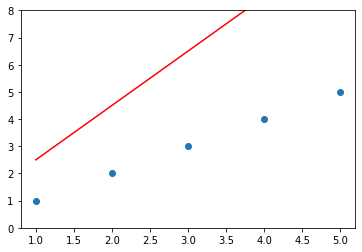

In [6]:
# 실제 데이터와 초기값으로 주어진 Hyphothesis
hypothesis.numpy()
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)
plt.show()

## Gradient descent

경사하강법은 error 제곱의 평균값인 cost를 minimize하는 여러 방법 중 하나이다.\
즉, $minimize_{W,b} cost(W,b)$

In [7]:
# Learning_rate initialize
learning_rate = 0.01

In [8]:
for i in range(100):

# Gradient descent
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
    W_grad, b_grad = tape.gradient(cost, [W,b])

    W.assign_sub(learning_rate*W_grad)
    b.assign_sub(learning_rate*b_grad)
    
    if i % 10 ==0: # 10번 반복될 때마다 값을 출력
        print("{:5}|{:10.4f}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

    0|    1.7500|      0.43| 14.250000
   10|    0.9990|    0.2146|  0.071626
   20|    0.9502|    0.1939|  0.007110
   30|    0.9486|    0.1866|  0.006374
   40|    0.9501|    0.1803|  0.005955
   50|    0.9517|    0.1743|  0.005565
   60|    0.9533|    0.1685|  0.005201
   70|    0.9549|    0.1629|  0.004860
   80|    0.9564|    0.1574|  0.004542
   90|    0.9578|    0.1522|  0.004245


* GradientTape()\
    with 구문과 사용되는데, with 안 변수의 정보를 tape에 저장한다.<p>
* tape.gradient(함수, 변수)\
    tape의 gradient method로 함수의 변수에 대한 경사도값(=미분값)을 구한다.\
그 값은 순서대로 반환한다.<p>
* A.assign_sub(B)\
    A = A-b\
    A -= B

(0.0, 8.0)

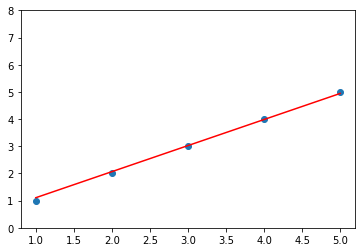

In [9]:
# Gradient descent로 minimize한 결과.
plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 8)